
Skewness (scipy) for numeric columns:
vix                     2.159549
sp500                   1.247928
sp500_volume            0.486238
djia                    1.011987
djia_volume             0.791613
hsi                    -0.067385
ads                    -8.953059
us3m                    0.316291
joblessness             0.013340
epu                     1.573008
GPRD                    4.242410
prev_day                1.247620
Unemployment Percent    1.216400
dtype: float64


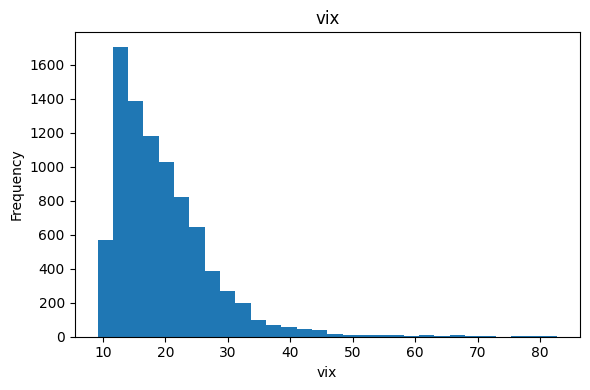

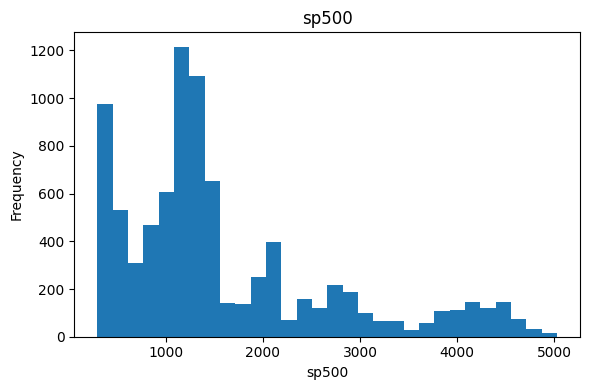

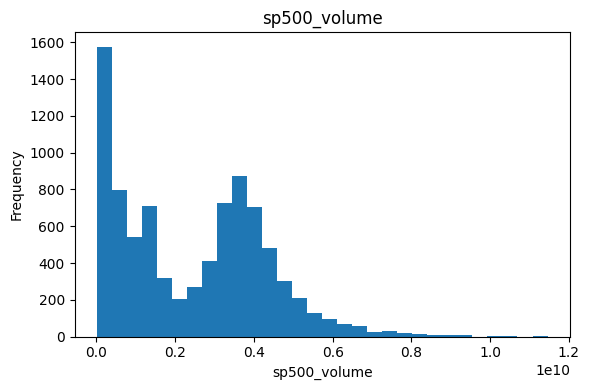

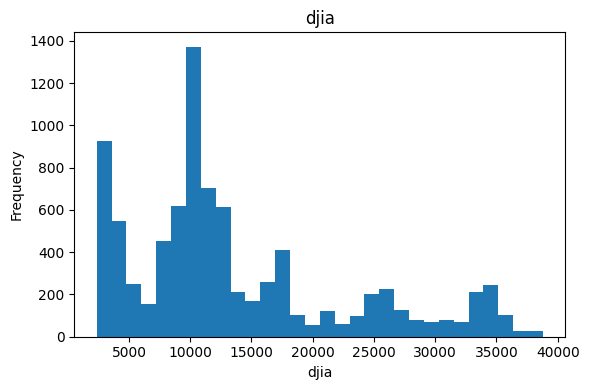

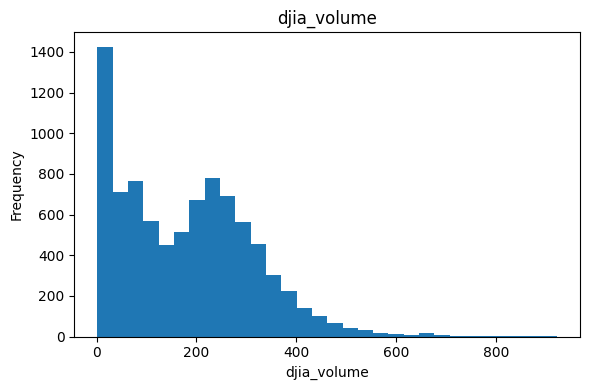

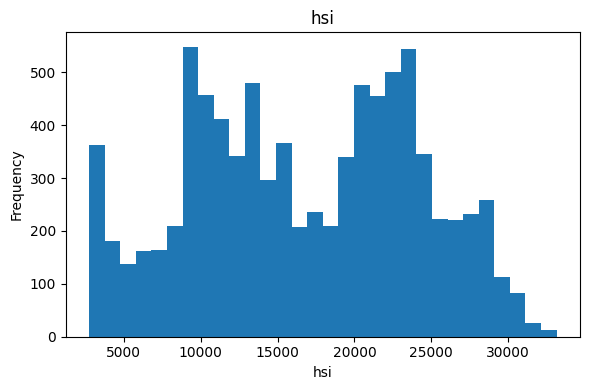

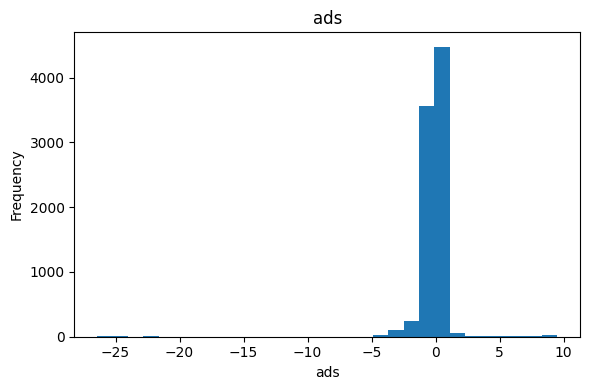

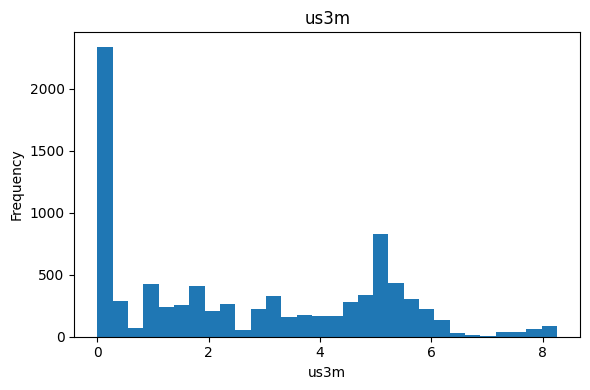

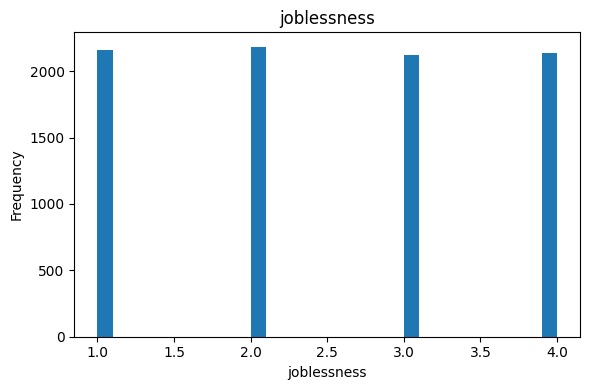

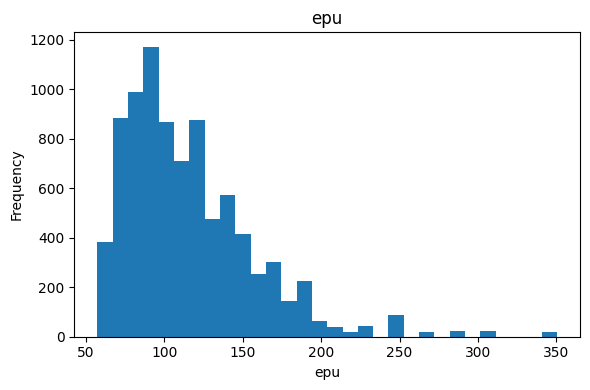

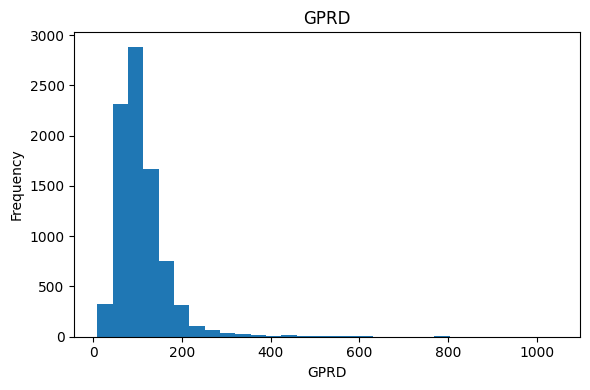

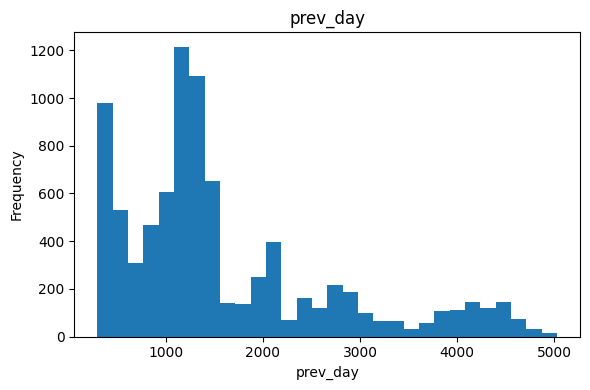

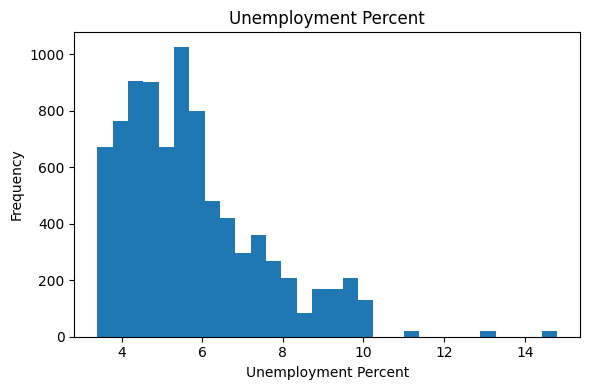


Correlation Matrix:
                           vix     sp500  sp500_volume      djia  djia_volume  \
vix                   1.000000 -0.033946      0.293789 -0.039044     0.326190   
sp500                -0.033946  1.000000      0.600873  0.994031     0.616660   
sp500_volume          0.293789  0.600873      1.000000  0.639978     0.698224   
djia                 -0.039044  0.994031      0.639978  1.000000     0.640660   
djia_volume           0.326190  0.616660      0.698224  0.640660     1.000000   
hsi                  -0.093128  0.698999      0.754069  0.750929     0.551387   
ads                  -0.326944  0.011039     -0.179511  0.002524    -0.183170   
us3m                 -0.104072 -0.321211     -0.664050 -0.375299    -0.358328   
joblessness           0.304748 -0.493094     -0.097514 -0.491054    -0.149539   
epu                   0.442294  0.370129      0.552875  0.386243     0.417251   
GPRD                  0.078926  0.056407     -0.017612  0.055648     0.125844   
prev_da

In [1]:
import pandas as pd
from scipy.stats import skew
import matplotlib.pyplot as plt
import seaborn as sns

stock_data = pd.read_csv('data/stock_data.csv')
unemployment = pd.read_csv('data/SeriesReport.csv')
#print('stock_data (head):')
#print(stock_data.head())   

# Converting the Observation Date Variable to a Datetime Variable
stock_data['dt'] = pd.to_datetime(stock_data['dt'])

# Unpivoting the Unemployment Data
unemployment_unpivot = unemployment.melt(id_vars='Year', var_name='Month', value_name='Unemployment Percent')

# Extracting the Year and Month from the Observation Date
stock_data['Year'] = stock_data['dt'].dt.year
stock_data['Month'] = stock_data['dt'].dt.month

# Replacing the Month Words with Month Numbers
month_replacement = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}

# Apply the mapping
unemployment_unpivot['Month'] = unemployment_unpivot['Month'].map(month_replacement)

# Merging the two DataFrames Together
stock_data_final = pd.merge(stock_data, unemployment_unpivot, on = ['Year', 'Month'], how = 'left')

# Returning the First Five Records
stock_data_final.head()

categorical_cols = stock_data_final.select_dtypes(include=['object']).columns.tolist()
numerical_cols = stock_data_final.select_dtypes(include=['int64', 'float64']).columns.tolist()

#print("Categorical columns:", categorical_cols)
#print("Numerical columns:", numerical_cols)

# Calculating Skewness for Numerical Columns
numeric_data=stock_data_final[numerical_cols]

skew_array = skew(numeric_data, axis=0, bias=False, nan_policy='omit')
skew_value = pd.Series(skew_array, index=numerical_cols)

print("\nSkewness (scipy) for numeric columns:")
print(skew_value)

for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    plt.hist(stock_data_final[col].dropna(), bins=30)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

#Correlation
corr_matrix = stock_data_final[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

#sp500 & djia, sp500_volume & djia_volume, are highly correlated (>0.9). 